In [5]:
pip install BioPython

In [6]:
# Import the necessary packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis


In [7]:
# Load data
bio = '/content/uniprotkb_organism_id_9606_AND_reviewed_2024_09_03.tsv'
df = pd.read_csv(bio, sep='\t')
df


,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Sequence,Subcellular location [CC]
0,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,SUBCELLULAR LOCATION: [Isoform 1]: Membrane {E...
1,A0AVI4,reviewed,TM129_HUMAN,E3 ubiquitin-protein ligase TM129 (EC 2.3.2.27...,TMEM129,Homo sapiens (Human),MDSPEVTFTLAYLVFAVCFVFTPNEFHAAGLTVQNLLSGWLGSEDA...,SUBCELLULAR LOCATION: Endoplasmic reticulum me...
2,A0JLT2,reviewed,MED19_HUMAN,Mediator of RNA polymerase II transcription su...,MED19 LCMR1,Homo sapiens (Human),MENFTALFGAQADPPPPPTALGFGPGKPPPPPPPPAGGGPGTAPPP...,SUBCELLULAR LOCATION: Nucleus {ECO:0000305}.
3,A0M8Q6,reviewed,IGLC7_HUMAN,Immunoglobulin lambda constant 7 (Ig lambda-7 ...,IGLC7,Homo sapiens (Human),GQPKAAPSVTLFPPSSEELQANKATLVCLVSDFNPGAVTVAWKADG...,SUBCELLULAR LOCATION: Secreted {ECO:0000303|Pu...
4,A0PJY2,reviewed,FEZF1_HUMAN,Fez family zinc finger protein 1 (Zinc finger ...,FEZF1 FEZ ZNF312B,Homo sapiens (Human),MDSSCHNATTKMLATAPARGNMMSTSKPLAFSIERIMARTPEPKAL...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...
...,...,...,...,...,...,...,...,...
11988,Q9H8W2,reviewed,CF155_HUMAN,Putative uncharacterized protein encoded by LI...,LINC00472 C6orf155,Homo sapiens (Human),MRPGSSPRAPECGAPALPRPQLDRLPARPAPSRGRGAPSLRWPAKE...,NaN
11989,Q9HAA7,reviewed,YG046_HUMAN,Putative uncharacterized protein FLJ11871,NaN,Homo sapiens (Human),MLFGIRILVNTPSPLVTGLHHYNPSIHRDQGECANQWRKGPGSAHL...,NaN
11990,Q9NZ38,reviewed,IDAS1_HUMAN,Uncharacterized protein IDI2-AS1 (IDI2 antisen...,IDI2-AS1 C10orf110 HT009,Homo sapiens (Human),MAFPGQSDTKMQWPEVPALPLLSSLCMAMVRKSSALGKEVGRRSEG...,NaN
11991,Q9UFV3,reviewed,YO007_HUMAN,Putative uncharacterized protein DKFZp434L187,NaN,Homo sapiens (Human),MAETYRRSRQHEQLPGQRHMDLLTGYSKLIQSRLKLLLHLGSQPPV...,NaN


In [8]:
cytosolic = df['Subcellular location [CC]'].str.contains("Cytosol") | df['Subcellular location [CC]'].str.contains("Cytoplasm")
membrane = df['Subcellular location [CC]'].str.contains("Membrane") | df['Subcellular location [CC]'].str.contains("Cell membrane")

In [9]:
cytosolic_df = df[cytosolic & ~membrane]
cytosolic_df

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Sequence,Subcellular location [CC]
9,A1E959,reviewed,ODAM_HUMAN,Odontogenic ameloblast-associated protein (Apin),ODAM APIN,Homo sapiens (Human),MKIIILLGFLGATLSAPLIPQRLMSASNSNELLLNLNNGQLLPLQL...,SUBCELLULAR LOCATION: Secreted {ECO:0000250|Un...
14,A1XBS5,reviewed,CBAR1_HUMAN,CBY1-interacting BAR domain-containing protein 1,CIBAR1 FAM92A FAM92A1,Homo sapiens (Human),MMRRTLENRNAQTKQLQTAVSNVEKHFGELCQIFAAYVRKTARLRD...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
18,A2RU49,reviewed,HYKK_HUMAN,Hydroxylysine kinase (5-hydroxy-L-lysine kinas...,HYKK AGPHD1,Homo sapiens (Human),MSSGNYQQSEALSKPTFSEEQASALVESVFGLKVSKVRPLPSYDDQ...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000305}.
20,A2RUH7,reviewed,MBPHL_HUMAN,Myosin-binding protein H-like,MYBPHL,Homo sapiens (Human),MEAATAPEVAAGSKLKVKEASPADAEPPQASPGQGAGSPTPQLLPP...,"SUBCELLULAR LOCATION: Cytoplasm, myofibril, sa..."
21,A4D126,reviewed,ISPD_HUMAN,D-ribitol-5-phosphate cytidylyltransferase (EC...,CRPPA ISPD,Homo sapiens (Human),MEAGPPGSARPAEPGPCLSGQRGADHTASASLQSVAGTEPGRHPQA...,"SUBCELLULAR LOCATION: Cytoplasm, cytosol {ECO:..."
...,...,...,...,...,...,...,...,...
11538,Q8WWF8,reviewed,CAPSL_HUMAN,Calcyphosin-like protein,CAPSL,Homo sapiens (Human),MAGTARHDREMAIQAKKKLTTATDPIERLRLQCLARGSAGIKGLGR...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000305}.
11615,Q9BYD9,reviewed,ACTT3_HUMAN,Actin-related protein T3 (ARP-T3) (Actin-relat...,ACTRT3 ARPM1,Homo sapiens (Human),MNHCQLPVVIDNGSGMIKAGVAGCREPQFIYPNIIGRAKGQSRAAQ...,"SUBCELLULAR LOCATION: Cytoplasm, cytoskeleton ..."
11668,Q9NUJ7,reviewed,PLCX1_HUMAN,PI-PLC X domain-containing protein 1,PLCXD1,Homo sapiens (Human),MGGQVSASNSFSRLHCRNANEDWMSALCPRLWDVPLHHLSIPGSHD...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
11670,Q9NVM6,reviewed,DJC17_HUMAN,DnaJ homolog subfamily C member 17,DNAJC17,Homo sapiens (Human),MAVTKELLQMDLYALLGIEEKAADKEVKKAYRQKALSCHPDKNPDN...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000250|U...


In [10]:
membrane_df = df[membrane & ~cytosolic]
membrane_df

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Sequence,Subcellular location [CC]
0,A0A0K2S4Q6,reviewed,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,CD300H,Homo sapiens (Human),MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,SUBCELLULAR LOCATION: [Isoform 1]: Membrane {E...
3,A0M8Q6,reviewed,IGLC7_HUMAN,Immunoglobulin lambda constant 7 (Ig lambda-7 ...,IGLC7,Homo sapiens (Human),GQPKAAPSVTLFPPSSEELQANKATLVCLVSDFNPGAVTVAWKADG...,SUBCELLULAR LOCATION: Secreted {ECO:0000303|Pu...
17,A2RU14,reviewed,TM218_HUMAN,Transmembrane protein 218,TMEM218,Homo sapiens (Human),MAGTVLGVGAGVFILALLWVAVLLLCVLLSRASGAARFSVIFLFFG...,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...
32,A5X5Y0,reviewed,5HT3E_HUMAN,5-hydroxytryptamine receptor 3E (5-HT3-E) (5-H...,HTR3E,Homo sapiens (Human),MEGSWFHRKRFSFYLLLGFLLQGRGVTFTINCSGFGQHGADPTALN...,SUBCELLULAR LOCATION: Postsynaptic cell membra...
35,A6ND01,reviewed,JUNO_HUMAN,Sperm-egg fusion protein Juno (Folate receptor...,IZUMO1R FOLR4 JUNO,Homo sapiens (Human),MACWWPLLLELWTVMPTWAGDELLNICMNAKHHKRVPSPEDKLYEE...,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...
...,...,...,...,...,...,...,...,...
11906,Q86UQ5,reviewed,GTSC1_HUMAN,Gilles de la Tourette syndrome chromosomal reg...,GTSCR1,Homo sapiens (Human),MQSDIYHPGHSFPSWVLCWVHSCGHEGHLRETAEIRKTHQNGDLQI...,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...
11932,Q8N8V8,reviewed,TM105_HUMAN,Transmembrane protein 105,TMEM105,Homo sapiens (Human),MLLKVRRASLKPPATPHQGAFRAGNVIGQLIYLLTWSLFTAWLRPP...,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...
11972,Q96N68,reviewed,CR015_HUMAN,Putative uncharacterized protein C18orf15,C18orf15,Homo sapiens (Human),MQGQGALKESHIHLPTEQPEASLVLQGQLAESSALGPKGALRPQAQ...,SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...
11979,Q9H0A3,reviewed,T191A_HUMAN,Transmembrane protein 191A,TMEM191A,Homo sapiens (Human),MMNNTDFLMLNNPWNKLCLVSMDFCFPLDFVSNLFWIFASKFIIVT...,SUBCELLULAR LOCATION: Membrane {ECO:0000255}; ...


In [11]:
# Define function to extract features from protein sequence
def get_sequence_features(sequence):
    analysis = ProteinAnalysis(sequence)
    return [

        analysis.aromaticity(),
        analysis.isoelectric_point(),

    ]

In [12]:
# Extract sequences from cytosolic and membrane dataframes
cytosolic_sequences = cytosolic_df['Sequence'].dropna().values
membrane_sequences = membrane_df['Sequence'].dropna().values

In [13]:
# Convert sequences to feature vectors
cytosolic_features = np.array([get_sequence_features(seq) for seq in cytosolic_sequences])
membrane_features = np.array([get_sequence_features(seq) for seq in membrane_sequences])

In [14]:
# Combine features
combined_features = np.vstack((cytosolic_features, membrane_features))

In [15]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_features)

In [16]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

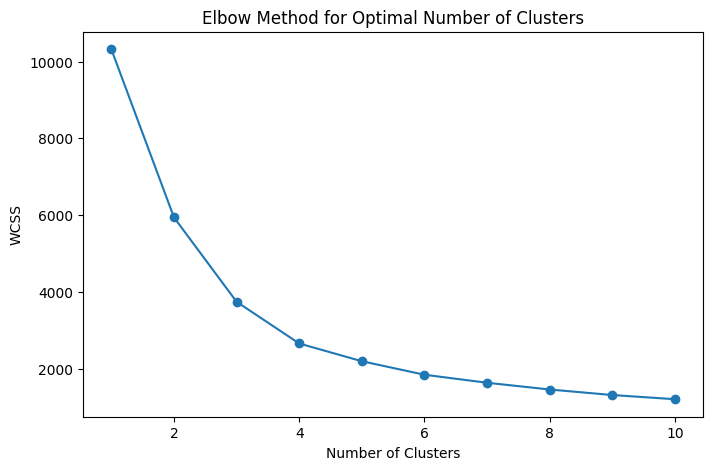

In [17]:
# Plot WCSS vs. Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# This shows us that theoptimal number of clusters is 2

In [18]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

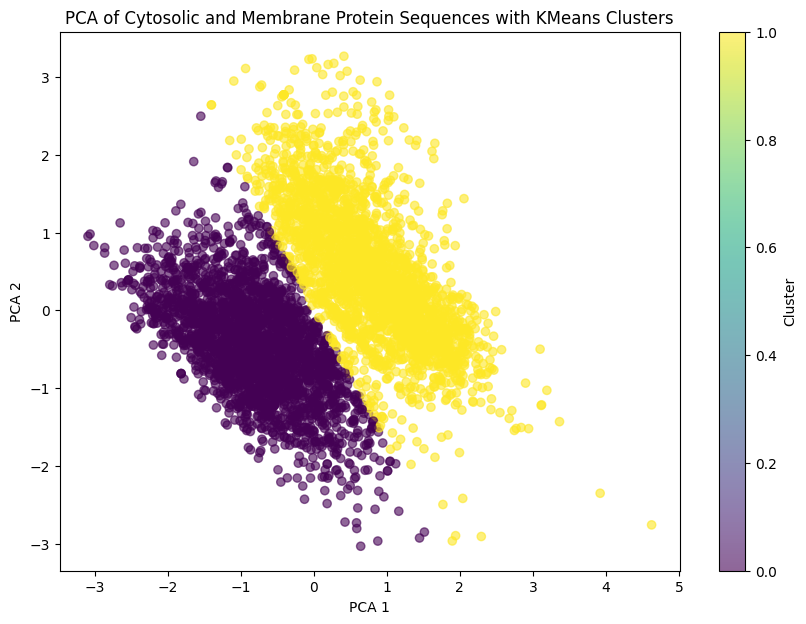

In [20]:
# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('PCA of Cytosolic and Membrane Protein Sequences with KMeans Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()